In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zameencom-property-data-pakistan/Property.csv
/kaggle/input/zameencom-property-data-pakistan/Property_with_Feature_Engineering.csv


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/kaggle/input/zameencom-property-data-pakistan/Property_with_Feature_Engineering.csv", on_bad_lines='skip')

In [5]:
df.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [6]:
print(df["city"].unique())
df.shape

['Lahore' 'Karachi' 'Islamabad' 'Faisalabad' 'Rawalpindi']


(191393, 24)

# EDA

In [7]:
df = df[df["city"] == "Karachi"]
df.shape
df.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
217,86575,6649,https://www.zameen.com/Property/faisal_cantonm...,House,450000000,Very High,Cantt,Karachi,Sindh,"Cantt, Karachi, Sindh",...,80.0,21780.08,For Sale,6,06-20-2019,2019,6,20,Premier Properties,Aamir Motiwala
218,342005,232,https://www.zameen.com/Property/karachi_gulist...,House,35000000,Very High,Gulistan-e-Jauhar,Karachi,Sindh,"Gulistan-e-Jauhar, Karachi, Sindh",...,16.0,4356.02,For Sale,6,07-18-2019,2019,7,18,NaN,NaN
219,466607,1484,https://www.zameen.com/Property/d_h_a_dha_phas...,Flat,21000000,Very High,DHA Defence,Karachi,Sindh,"DHA Defence, Karachi, Sindh",...,8.9,2423.03,For Sale,3,10-20-2018,2018,10,20,NaN,NaN
220,678919,9594,https://www.zameen.com/Property/malir_malir_ka...,House,6500000,Low,Malir,Karachi,Sindh,"Malir, Karachi, Sindh",...,3.2,871.20,For Sale,2,03-10-2019,2019,3,10,NaN,NaN
221,813506,6732,https://www.zameen.com/Property/surjani_town_s...,House,13000000,Medium,Gadap Town,Karachi,Sindh,"Gadap Town, Karachi, Sindh",...,9.6,2613.61,For Sale,4,07-18-2019,2019,7,18,NaN,NaN


In [8]:
col_names = ["location_id","page_url","province_name","locality","area_marla","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"]
df = df.drop(col_names, axis=1)

In [9]:
df = df.reset_index()
df = df.drop("index", axis=1)
df.head()

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
2,21000000,DHA Defence,3,2423.03,3
3,6500000,Malir,1,871.20,2
4,13000000,Gadap Town,4,2613.61,4


In [10]:
df.isna().sum()

price        0
location     0
baths        0
area_sqft    0
bedrooms     0
dtype: int64

In [11]:
!pip install matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [13]:
df["bedrooms"].unique()

array([ 6,  3,  2,  4,  7,  5, 11,  0,  1,  9,  8, 10, 15, 12, 14, 13, 16,
       68, 25])

# DATA CLEANING

In [14]:
df[df['bedrooms']>13]

,price,location,baths,area_sqft,bedrooms
2932,350000000,DHA Defence,0,21780.08,15
14349,330000000,DHA Defence,0,21780.08,14
20000,350000,Jamshed Town,0,4900.52,14
46833,150000000,Gulistan-e-Jauhar,6,6534.02,16
50947,2500000,North Nazimabad,0,35937.13,68
52129,550000,Jamshed Town,0,16335.06,25
55102,450000,Gulshan-e-Iqbal Town,0,8167.53,15
55103,900000,Gulshan-e-Iqbal Town,0,16335.06,25
55539,250000,North Nazimabad,0,4900.52,15


In [15]:
df['baths'].unique()

array([ 7,  8,  3,  1,  4,  6,  0,  5,  2,  9, 10, 13, 11, 12])

In [16]:
df = df.drop(df[(df['baths']== 0) & (df['bedrooms'] > 3)].index)
df

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
2,21000000,DHA Defence,3,2423.03,3
3,6500000,Malir,1,871.20,2
4,13000000,Gadap Town,4,2613.61,4
...,...,...,...,...,...
60477,14000000,Bahria Town Karachi,4,3811.51,4
60478,4800000,Gadap Town,0,1034.55,2
60480,12500000,Gadap Town,0,2178.01,3
60482,11000000,Gadap Town,0,2123.56,3


In [17]:
df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index, inplace=True)

In [18]:
df[df["baths"] > df["bedrooms"]].head(25)

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
9,12800000,Scheme 33,6,2613.61,5
11,34000000,Cantt,4,3103.66,3
16,17000000,Gulshan-e-Iqbal Town,5,1306.80,4
27,59500000,Malir,6,3811.51,5
29,58500000,Malir,5,3811.51,4
32,58500000,Malir,5,3811.51,4
33,58000000,Malir,5,3811.51,4
37,59500000,Malir,5,3811.51,4


## OUTLINERS DETECTIONN AND REMOVALS

In [19]:
df['price_per_sqft'] = df['price'] / df['area_sqft']
df.head()

,price,location,baths,area_sqft,bedrooms,price_per_sqft
0,450000000,Cantt,7,21780.08,6,20661.081135
1,35000000,Gulistan-e-Jauhar,8,4356.02,6,8034.857508
2,21000000,DHA Defence,3,2423.03,3,8666.834501
3,6500000,Malir,1,871.20,2,7460.973370
4,13000000,Gadap Town,4,2613.61,4,4973.963216


In [20]:
len(df['location'].unique())

199

In [21]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(40)

location
DHA Defence                   8688
Bahria Town Karachi           7870
Gulistan-e-Jauhar             4332
Gulshan-e-Iqbal Town          3658
Gadap Town                    2230
North Karachi                 2113
North Nazimabad               2097
Scheme 33                     2060
Cantt                         1505
Clifton                       1470
Malir                         1140
Jamshed Town                  1132
Federal B Area                1124
Nazimabad                      934
Korangi                        736
Liaquatabad                    361
Bath Island                    265
Shah Faisal Town               206
Mehmoodabad                    205
Navy Housing Scheme Karsaz     203
New Karachi                    192
Bin Qasim Town                 191
Jinnah Avenue                  181
Shahra-e-Faisal                180
Fazaia Housing Scheme          170
Civil Lines                    169
Garden West                    162
Abul Hassan Isphani Road       146
University 

In [22]:
len(location_stats[location_stats <= 10])

98

In [23]:
locations_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)

In [24]:
df['location'].nunique()

102

In [25]:
df[df['area_sqft'] / df['bedrooms'] < 300]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
5,32000000,DHA Defence,4,1089.00,4,29384.756657
6,4000000,Malir,3,871.20,7,4591.368228
41,4500000,Saddar Town,1,353.93,2,12714.378549
53,100000000,Gulshan-e-Iqbal Town,9,2613.61,9,38261.255505
91,3500000,Abul Hassan Isphani Road,3,1388.48,5,2520.742106
...,...,...,...,...,...,...
60363,26000,DHA Defence,2,598.95,2,43.409300
60396,110000,DHA Defence,4,598.95,3,183.654729
60399,22000,DHA Defence,1,108.90,1,202.020202
60405,12000000,North Karachi,5,1306.80,5,9182.736455


In [26]:
df.drop(df[df['area_sqft'] / df['bedrooms'] < 300].index, inplace = True)

In [27]:
df['price_per_sqft'].describe()

count     43904.000000
mean       6658.211901
std        6461.973477
min           0.000184
25%         713.254332
50%        5684.526282
75%        9305.115977
max      316802.953154
Name: price_per_sqft, dtype: float64

In [28]:
# removing price_per_sqft outliers 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-std)) & (subdf['price_per_sqft'] <= (m+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [29]:
df = remove_pps_outliers(df)
df.shape

(29598, 6)

In [30]:
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

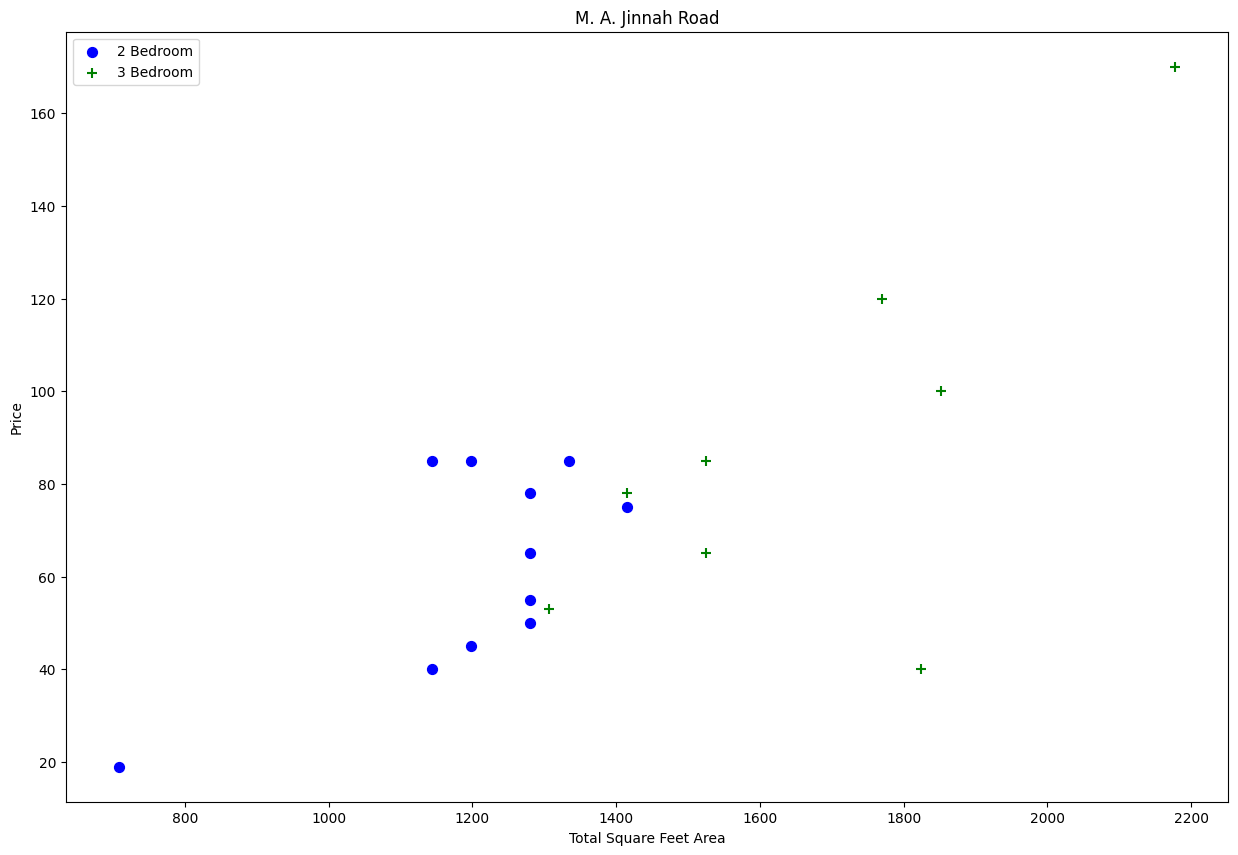

In [31]:
plot_scatter_chart(df, "M. A. Jinnah Road")

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_df["price_per_sqft"]),
                'std' : np.std(bedroom_df["price_per_sqft"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index")

In [33]:
df = remove_bhk_outliers(df)
df.shape

(17116, 6)

In [34]:
df.groupby('location')['location'].agg('count').sort_values(ascending=False).head(40)

location
DHA Defence                 3043
Bahria Town Karachi         1878
Gulistan-e-Jauhar           1632
Gulshan-e-Iqbal Town        1405
Gadap Town                  1111
Scheme 33                    905
North Nazimabad              776
North Karachi                636
Clifton                      630
Cantt                        611
Jamshed Town                 464
Federal B Area               383
Nazimabad                    359
Malir                        284
Korangi                      166
others                       157
Liaquatabad                  109
Fazaia Housing Scheme        104
Defence View Society          96
Garden West                   95
Mehmoodabad                   95
Bath Island                   93
Shahra-e-Faisal               87
Shah Faisal Town              84
Jamshed Road                  76
Khalid Bin Walid Road         69
Jinnah Avenue                 68
Sea View Apartments           68
New Karachi                   67
Abul Hassan Isphani Road      66
U

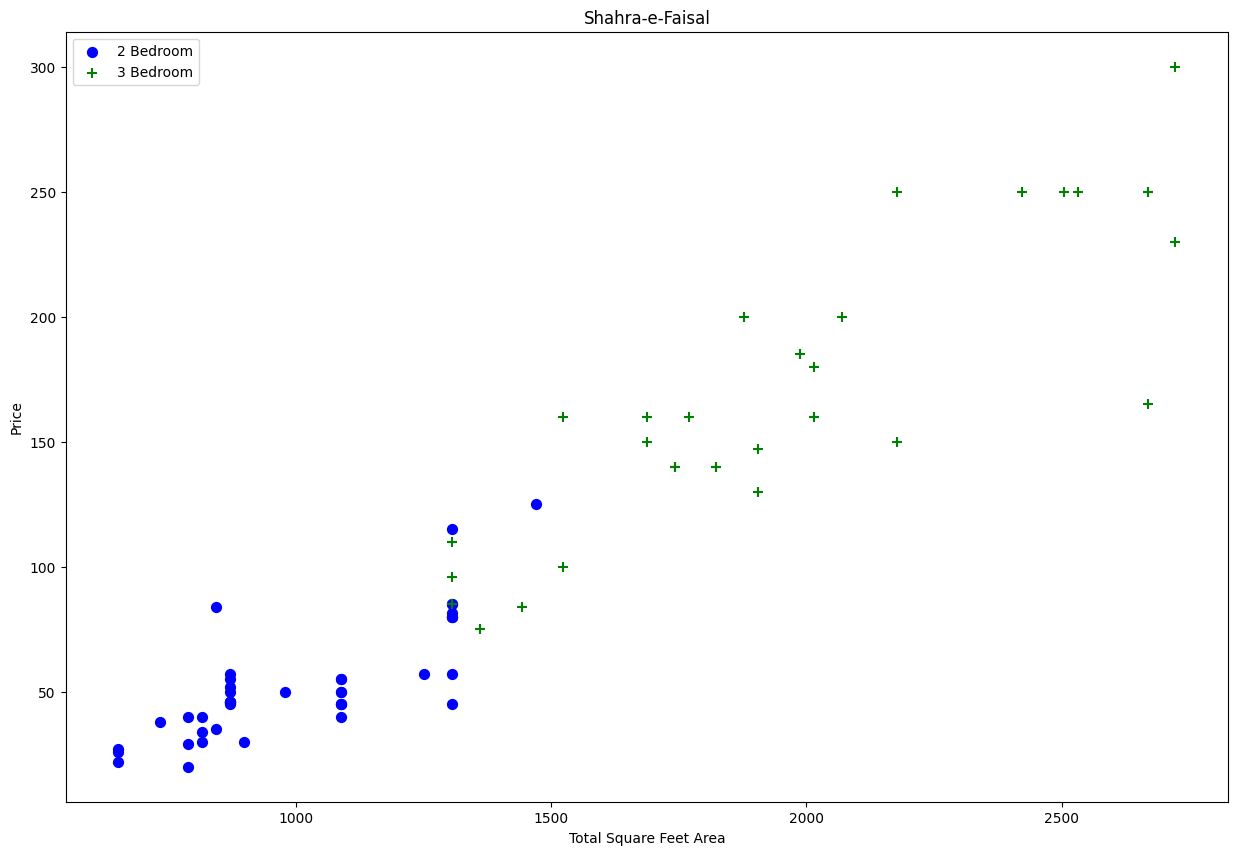

In [35]:
plot_scatter_chart(df,"Shahra-e-Faisal")

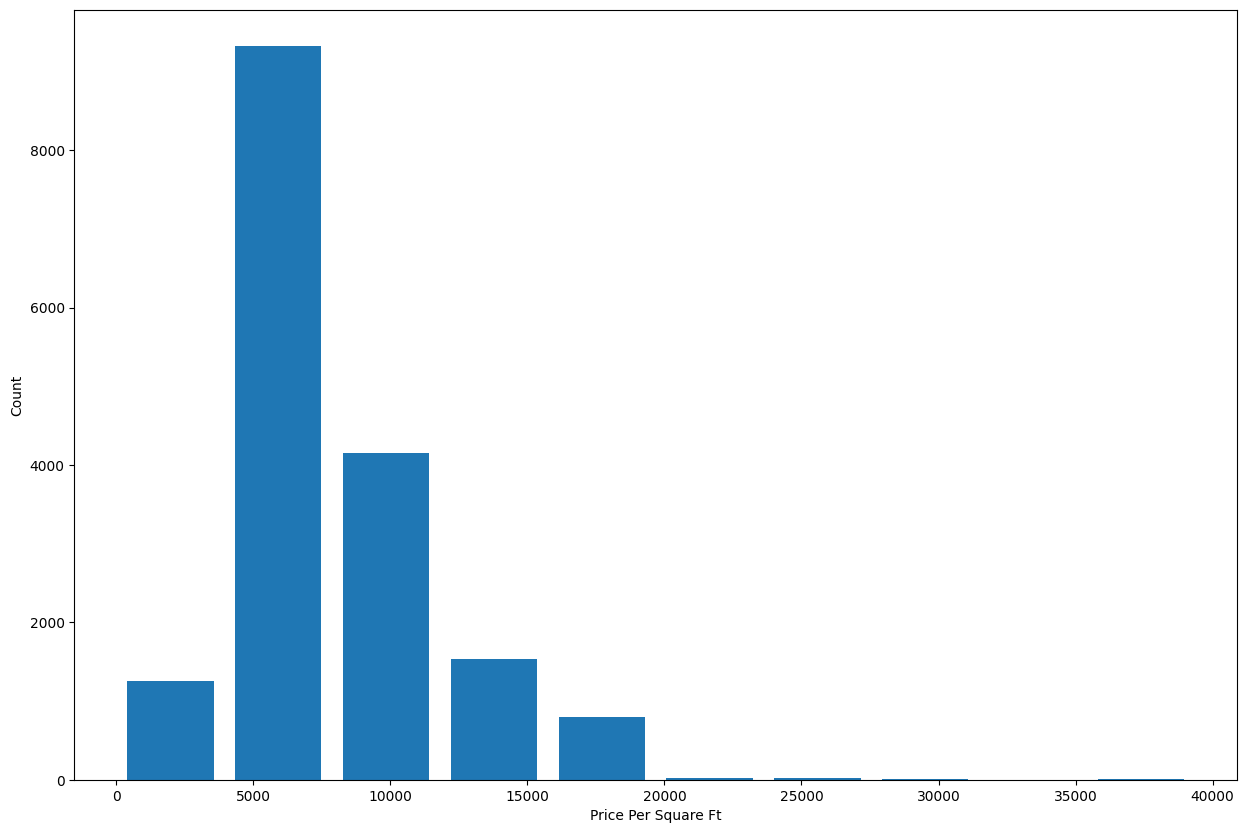

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

In [37]:
df[df['baths'] > df['bedrooms']]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1,5500000,Abid Town,3,1089.00,2,5050.505051
18,3800000,Abul Hassan Isphani Road,3,1034.55,2,3673.094582
35,3200000,Abul Hassan Isphani Road,3,1442.93,2,2217.709799
102,9500000,Airport,3,1524.61,2,6231.101724
160,5500000,Aisha Manzil,3,871.20,2,6313.131313
...,...,...,...,...,...,...
29548,15000000,others,6,1306.80,4,11478.420569
29562,18000000,others,8,2613.61,7,6887.025991
29575,27500000,others,4,2423.03,3,11349.426132
29582,12500000,others,3,1388.48,2,9002.650380


In [38]:
df[df['baths'] > (df['bedrooms'] + 2)]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1754,38400000,Bahria Town Karachi,8,5445.02,5,7052.315694
5604,40000000,Cantt,10,3593.71,4,11130.558671
6438,9000000,Clifton,6,898.43,2,10017.474928
7303,50000,Clifton,5,1197.90,2,41.739711
7582,24500000,DHA City Karachi,6,38115.14,2,642.789191
8773,85000000,DHA Defence,8,5445.02,5,15610.594635
9406,100000000,DHA Defence,8,5445.02,5,18365.405453
10915,95000000,DHA Defence,8,6534.02,5,14539.288218
10964,85000000,DHA Defence,6,5445.02,3,15610.594635
14317,20000,Defence View Society,7,871.20,2,22.956841


In [39]:
df = df.drop(df[df['baths'] > (df['bedrooms'] + 2)].index)
df.shape

(17085, 6)

In [40]:
df1 = df.drop("price_per_sqft", axis=1)

In [41]:
dummies = pd.get_dummies(df1['location'], dtype=int)
dummies.head(3)

,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,Azam Town,Bagh-e-Korangi,Bahria Town Karachi,...,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df1 = pd.concat([df1, dummies.drop('others', axis=1)], axis="columns")
df1 = df1.drop("location", axis=1)
df1.head()
df1.shape

(17085, 105)

## MODEL BUILDING

In [43]:
X = df1.drop('price', axis=1)
X.head()

,baths,area_sqft,bedrooms,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,...,Shahra-e-Faisal,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
0,3,1932.98,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1089.00,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1089.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1442.93,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1388.48,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = df1['price']
y.head()

0    8500000
1    5500000
2    6500000
3    5600000
4    8150000
Name: price, dtype: int64

In [45]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [46]:
modelXG = XGBRegressor(verbosity=0, enable_categorical=True, learning_rate=0.05)

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2, random_state=10)

### Training multiple models

In [48]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {}
        },
        'decision_tree_regressor' : {
            'model' : DecisionTreeRegressor(),
            'params' : {'criterion' : ['mse', 'friedman_mse'], 'splitter': ['best','random']}
        },
        'laso' : {
            'model' : Lasso(),
            'params' : {'alpha' : [1,2], 'selection' : ['random', 'cyclic']}
        },
        'xgboost' : {
            'model' : XGBRegressor(),
            'params' : {'verbosity': [0],          
                        'enable_categorical': [True],     
                        'learning_rate': [0.05],  }
        }
    }
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_names, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=1, cv=cv)
        gs.fit(X,y)
        scores.append({
            'model' : algo_names,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_,
        })
        
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [49]:
find_best_model_using_gridsearchcv(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.836238,{}
1,decision_tree_regressor,0.935977,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,laso,0.836239,"{'alpha': 2, 'selection': 'random'}"
3,xgboost,0.929077,"{'enable_categorical': True, 'learning_rate': ..."


As decision_tree_regressor performs the best with 93% accuracy we will be using its best params and bulding our model..


In [50]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=0)
dtr.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0,
                      splitter='random')

In [51]:
columns = X.columns

In [52]:
feat = pd.DataFrame(X, columns=columns)
feat

,baths,area_sqft,bedrooms,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,...,Shahra-e-Faisal,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
0,3,1932.98,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1089.00,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1089.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1442.93,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1388.48,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29593,4,2668.06,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,4,2668.06,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29595,2,1089.00,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29596,2,980.10,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
max = feat['bedrooms'].max()
max

11

In [54]:
feat.to_csv('features.csv', index=False)

In [55]:
def predict_price(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]= baths
    x[1]=sqft
    x[2]=bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    return dtr.predict([x])[0] / 100000

In [56]:
!python --version

Python 3.10.13


In [57]:
print(str(int(predict_price('Nazimabad', 1800, 4, 3))) + " Lakhs")

160 Lakhs


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [58]:
print(str(int(predict_price('Scheme 33', 1080, 3, 2))) + " Lakhs")

80 Lakhs


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [59]:
import pickle

In [60]:
filename = 'finalized_model.pkl'
pickle.dump(dtr, open(filename, 'wb'))

In [61]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lime, mapclassify, mlxtend, nilearn, pyLDAvis, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick
